# Weather Project - Rain Precipitation between Seattle and Honolulu - Data Preparation

## Import Libraries

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load the data

### Seattle

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/seattle_rain.csv')

In [4]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Reduce columns to Station, Name, Date and PRCP

In [5]:
df_seattle = df_seattle[['STATION','NAME','DATE','PRCP']]
df_seattle.head()

,STATION,NAME,DATE,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,0.25


### Honolulu

In [6]:
df_honolulu = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/hnl_rain.csv')

In [7]:
df_honolulu.head()

,STATION,NAME,DATE,PRCP
0,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-01,0.0
1,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-02,0.0
2,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-03,0.0
3,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-04,0.0
4,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-05,0.0


Reduce columns to Station, Name, Date and PRCP

In [8]:
df_honolulu = df_honolulu[['STATION','NAME','DATE','PRCP']]
df_honolulu.head()

,STATION,NAME,DATE,PRCP
0,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-01,0.0
1,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-02,0.0
2,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-03,0.0
3,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-04,0.0
4,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-05,0.0


## Data cleanup and preparation for analysis

Validate data size

In [9]:
print(df_seattle.shape)
print(df_honolulu.shape)

(1658, 4)
(1826, 4)


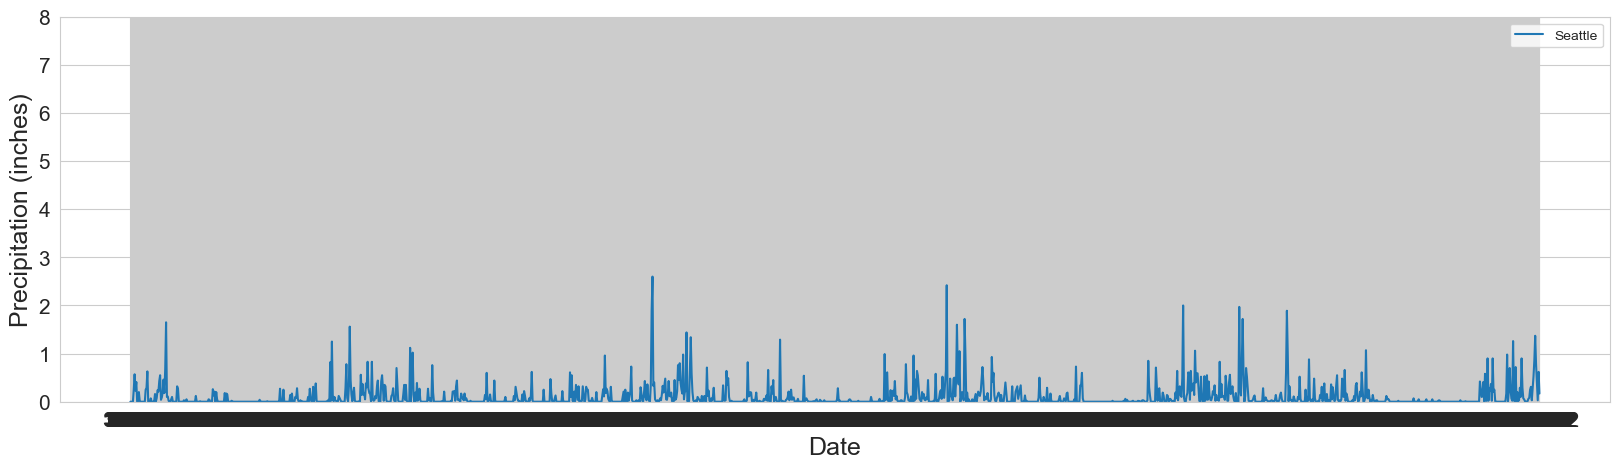

In [10]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP', label='Seattle')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (inches)',fontsize=18)
plt.ylim(0, 8)
plt.tick_params(labelsize=15)
plt.show()


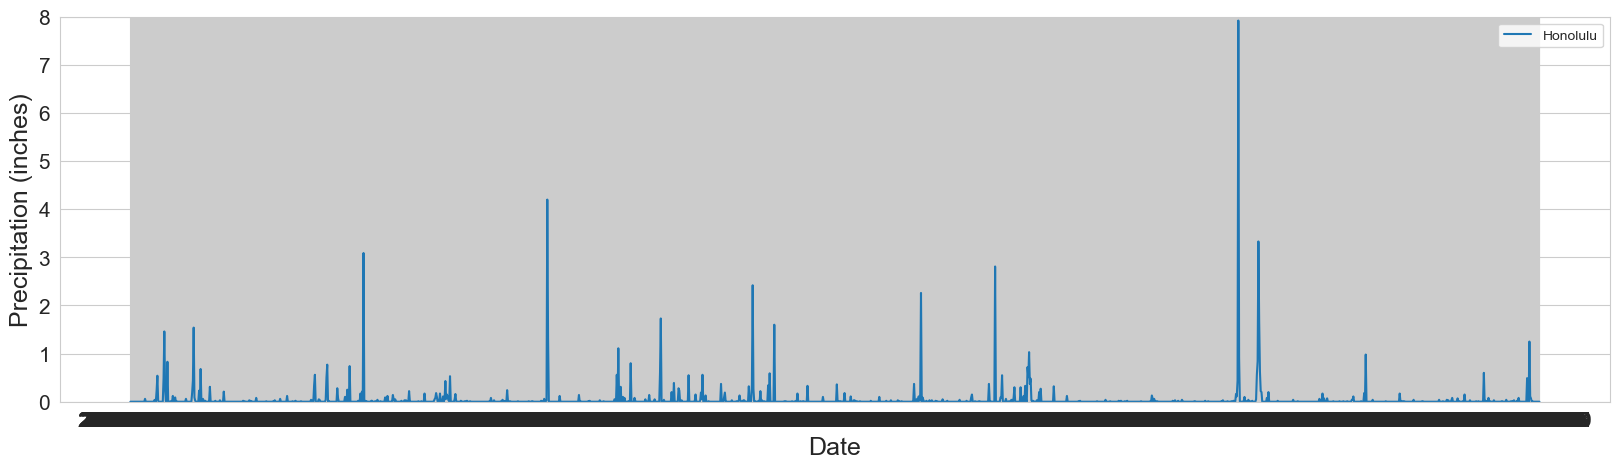

In [11]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_honolulu, x='DATE', y='PRCP', label='Honolulu')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (inches)',fontsize=18)
plt.ylim(0, 8)

plt.tick_params(labelsize=15)
plt.show()


In [12]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [13]:
df_honolulu['STATION'].unique()

array(['USW00022521'], dtype=object)

In [14]:
df_seattle.tail()


,STATION,NAME,DATE,PRCP
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/27/22,0.78
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/28/22,0.40
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/29/22,0.03
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/30/22,0.62
1657,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/31/22,0.17


In [15]:
df_honolulu.tail()

,STATION,NAME,DATE,PRCP
1821,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-27,0.0
1822,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-28,0.0
1823,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-29,0.0
1824,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-30,0.0
1825,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2022-12-31,0.0


From analysis of the data:
-   [x] Validate date ranges  (2018-01-01-2022-12-31) 
-   [x] One station is used in Seattle and Honolulu
-   [x] Dates require consitent format

In [16]:
# Unifying date format:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_honolulu['DATE'] = pd.to_datetime(df_honolulu['DATE'])


C:\Users\Jack\AppData\Local\Temp\ipykernel_42736\1210292781.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [17]:
display(df_seattle.head())

,STATION,NAME,DATE,PRCP
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,0.00
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,0.00
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,0.00
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,0.00
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,0.25


In [18]:
display(df_honolulu.head())

,STATION,NAME,DATE,PRCP
0,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-01,0.0
1,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-02,0.0
2,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-03,0.0
3,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-04,0.0
4,USW00022521,"HONOLULU INTERNATIONAL AIRPORT, HI US",2018-01-05,0.0


### Merge weather data into single data gframerame and normalize data frame structure


In [19]:
df_stl_hnl = df_seattle[['DATE','PRCP']].merge(df_honolulu[['DATE','PRCP']], on='DATE',how='outer')

# Tidy data frame to columns: date, precipitation, city
df_stl_hnl = df_stl_hnl.melt(id_vars=['DATE'], var_name='city', value_name='precipitation') 
df_stl_hnl['city'] = df_stl_hnl['city'].map({'PRCP_x': 'Seattle', 'PRCP_y': 'Honolulu'})
df_stl_hnl = df_stl_hnl.rename(columns={'DATE': 'date'})
#df_stl_hnl = df_stl_hnl.sort_values(by=['date','city']).reset_index(drop=True)
df_stl_hnl
                               

,date,city,precipitation
0,2018-01-01,Seattle,0.00
1,2018-01-02,Seattle,0.00
2,2018-01-03,Seattle,0.00
3,2018-01-04,Seattle,0.00
4,2018-01-05,Seattle,0.25
...,...,...,...
3647,2022-12-27,Honolulu,0.00
3648,2022-12-28,Honolulu,0.00
3649,2022-12-29,Honolulu,0.00
3650,2022-12-30,Honolulu,0.00


### Replacing missing precipitation data with average across years

In [20]:
df_stl_hnl.loc[df_stl_hnl['city']=='Seattle','precipitation'].isna().sum()

np.int64(190)

In [21]:
df_stl_hnl.loc[df_stl_hnl['city']=='Honolulu','precipitation'].isna().sum() 

np.int64(0)

In [22]:
# Add day of year column
df_stl_hnl['day_of_year'] = pd.DatetimeIndex(df_stl_hnl['date']).dayofyear

# Calculate average precipitation for each day of the year for Seattle (only Seattle has missing data)
mean_precip_seattle = df_stl_hnl.loc[df_stl_hnl['city']=='Seattle',['precipitation','day_of_year']].groupby('day_of_year').mean()
indicies = np.where((df_stl_hnl['city']=='Seattle') & (df_stl_hnl['precipitation'].isna()==True))[0]
#indicies
for i in indicies:
    day_of_year = df_stl_hnl.loc[i,'day_of_year']
    df_stl_hnl.loc[i,'precipitation'] = mean_precip_seattle.loc[day_of_year,'precipitation']
#df_stl_hnl['precipitation'].isna().sum()



In [23]:
## Export preprocessed data to csv file
df_stl_hnl.to_csv('../data/seattle_honolulu_rain_clean.csv', index=False)